## Imports

In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Import Data
Data structure and content
* 3 columns:
    1. Rating: the rating given for the review
    2. Summary: summary of the complete review text
    3. Text: the complete text of the review

In [45]:
df = pd.read_csv('Reviews.csv')
df = df.rename(columns={'Score': 'Rating'})
df

,Rating,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...
568449,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


### Data Distribution

Number of different ratings: 5
Ratings: [1 2 3 4 5]


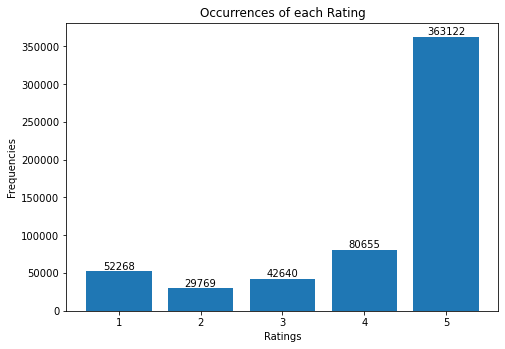

In [46]:
print('Number of different ratings:', len(pd.unique(df['Rating'])))
ratings = pd.unique(df['Rating'])
ratings.sort(axis=0)
print('Ratings:', ratings)

rating_frequencies = []
for i in range(1,6):
    rating_frequencies.append(df[df.Rating == i].shape[0])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Occurrences of each Rating')
plt.xlabel('Ratings')
plt.ylabel('Frequencies')
bars = ax.bar(ratings,rating_frequencies)
for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center', va='bottom')
plt.show()

In [47]:
print('Number of data points:', len(df.index))
print('Number of null values in each column:')
print(df.isna().sum())

Number of data points: 568454
Number of null values in each column:
Rating      0
Summary    27
Text        0
dtype: int64


No null values in important columns Rating and Text

Only 27/568454 rows have null values so remove those rows

In [48]:
df.dropna(inplace = True)

In [49]:
print('Number of data points:', len(df.index))

Number of data points: 568427


Change all ratings above 3 to positive and below 3 to negative. Remove reviews with a neutral rating of 3.

In [50]:
df = df.drop(df[df.Rating == 3].index)
df['Rating'] = df['Rating'].apply(lambda x : ('pos') if (x > 3) else ('neg'))
print('Number of data points:', len(df.index))
print(df.head(10))

Number of data points: 525789
  Rating                                        Summary  \
0    pos                          Good Quality Dog Food   
1    neg                              Not as Advertised   
2    pos                          "Delight" says it all   
3    neg                                 Cough Medicine   
4    pos                                    Great taffy   
5    pos                                     Nice Taffy   
6    pos  Great!  Just as good as the expensive brands!   
7    pos                         Wonderful, tasty taffy   
8    pos                                     Yay Barley   
9    pos                               Healthy Dog Food   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a

In [51]:
print('Checking types of df columns:')
df.dtypes

Checking types of df columns:


Rating     object
Summary    object
Text       object
dtype: object

In [56]:
df = df.reset_index()
df

,level_0,index,Rating,Summary,Text
0,0,0,pos,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,1,neg,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,2,pos,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,neg,Cough Medicine,If you are looking for the secret ingredient i...
4,4,4,pos,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
525784,525784,568449,pos,Will not do without,Great for sesame chicken..this is a good if no...
525785,525785,568450,neg,disappointed,I'm disappointed with the flavor. The chocolat...
525786,525786,568451,pos,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
525787,525787,568452,pos,Favorite Training and reward treat,These are the BEST treats for training and rew...
